In [80]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17, 8
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
data = pd.read_csv('./public/AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month',inplace=True)

In [29]:
data['#Passengers'].head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [42]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

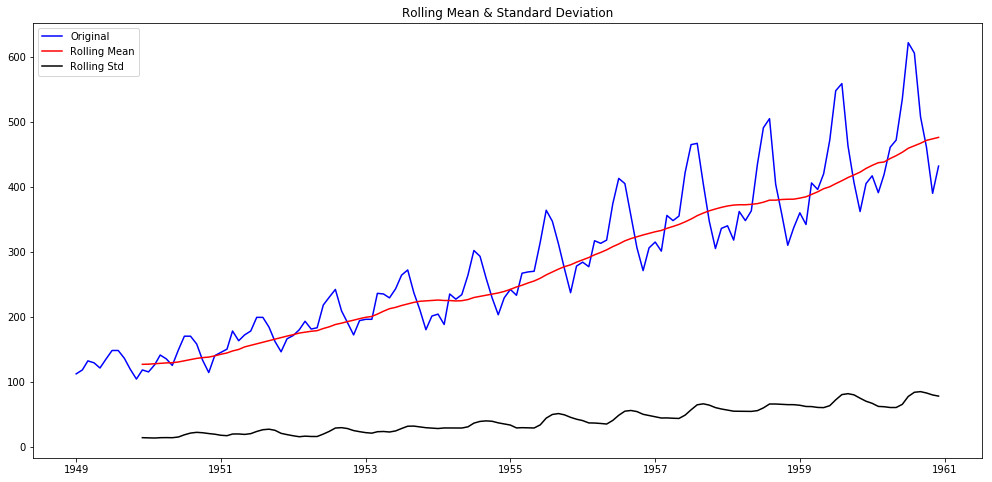

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [47]:
test_stationarity(data['#Passengers'])

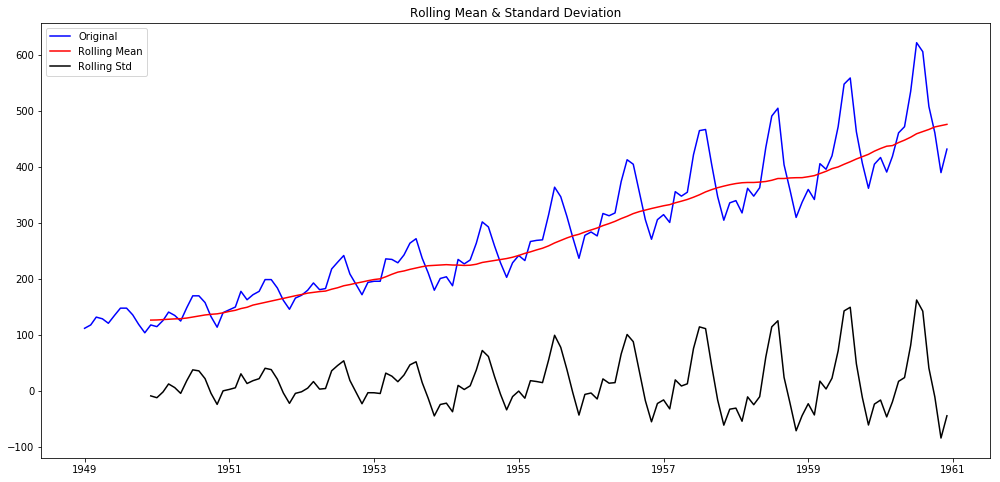

Results of Dickey-Fuller Test:
Test Statistic                  -3.164968
p-value                          0.022104
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [55]:
timeseries = data['#Passengers']
rolmean = timeseries.rolling(12).mean()
rolstd = timeseries.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(timeseries, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(timeseries-rolmean, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller((timeseries-rolmean).dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

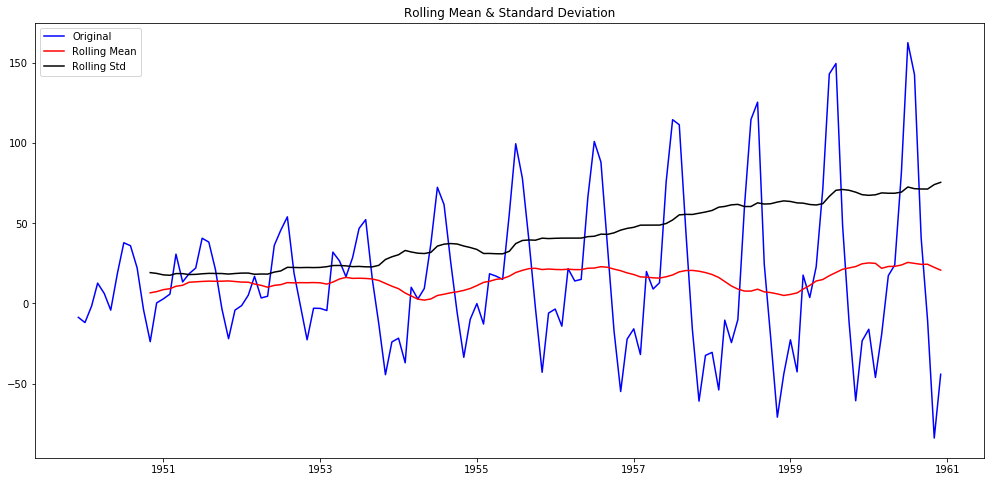

Results of Dickey-Fuller Test:
Test Statistic                  -3.164968
p-value                          0.022104
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [57]:
timeseries = data['#Passengers']
rolmean = timeseries.rolling(12).mean()
time_rol_diff = (timeseries-rolmean).dropna()

test_stationarity(time_rol_diff)

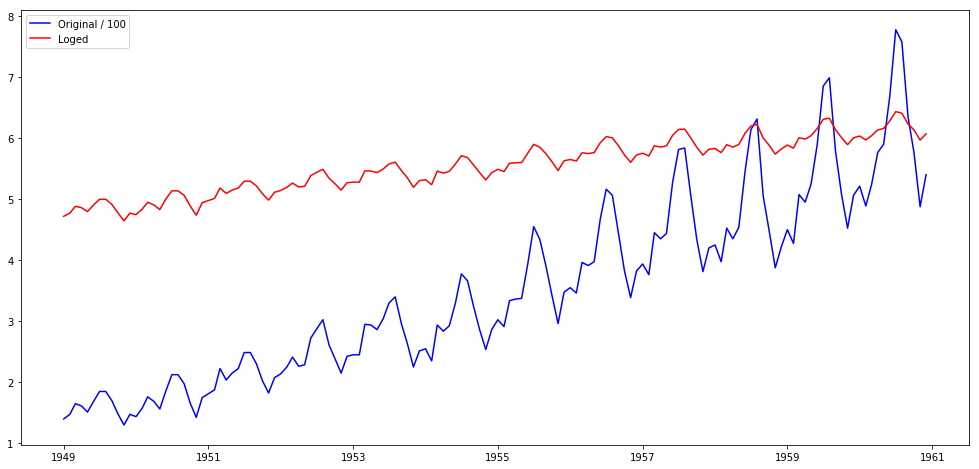

In [65]:
timeseries = data['#Passengers']

#Plot rolling statistics:
orig = plt.plot(timeseries/80, color='blue',label='Original / 100')
log = plt.plot(np.log(timeseries), color='red', label='Loged')
plt.legend(loc='best')
plt.show(block=False)

In [66]:
ts_log = np.log(data['#Passengers'])

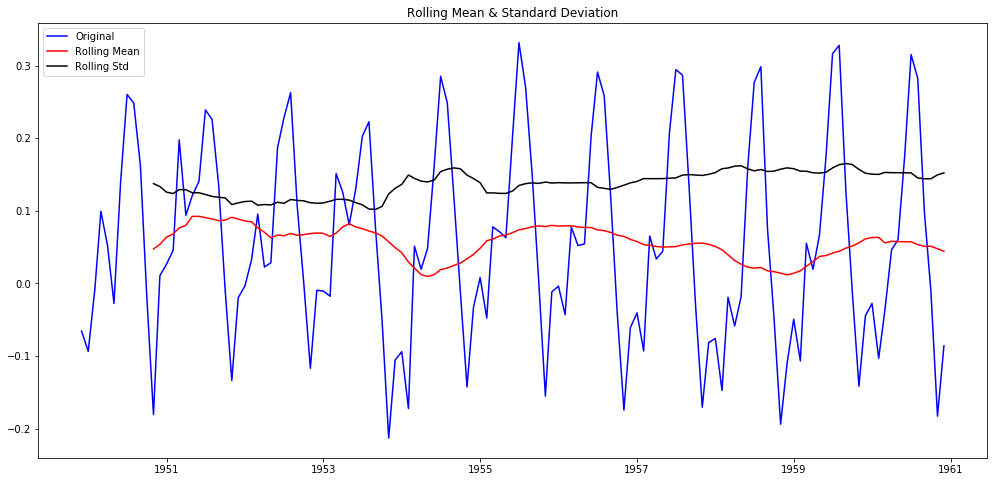

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [68]:
rolmean = ts_log.rolling(12).mean()
time_rol_diff = (ts_log-rolmean).dropna()

test_stationarity(time_rol_diff)

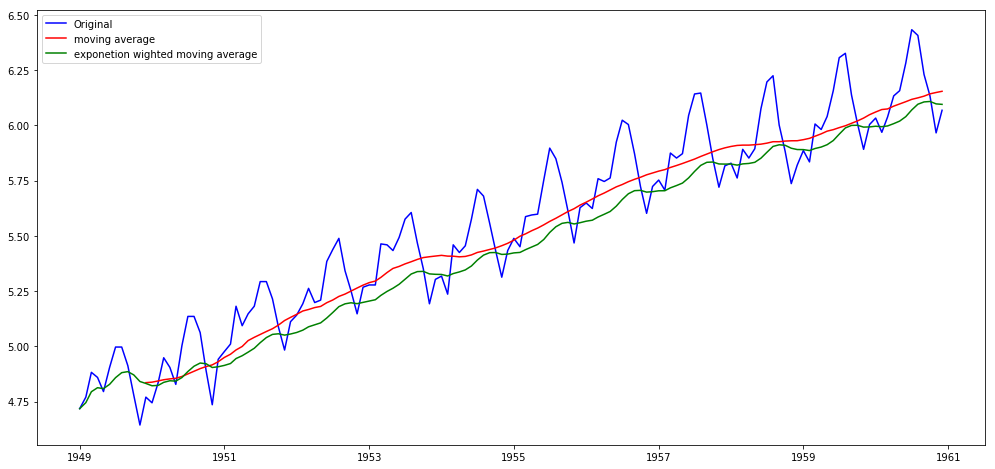

In [70]:
#Plot rolling statistics:
orig = plt.plot(ts_log, color='blue',label='Original')
ma = plt.plot(ts_log.rolling(12).mean(), color='red', label='moving average')
ewma = plt.plot(ts_log.ewm(12).mean(), color='green', label='exponetion wighted moving average')
plt.legend(loc='best')
plt.show(block=False)

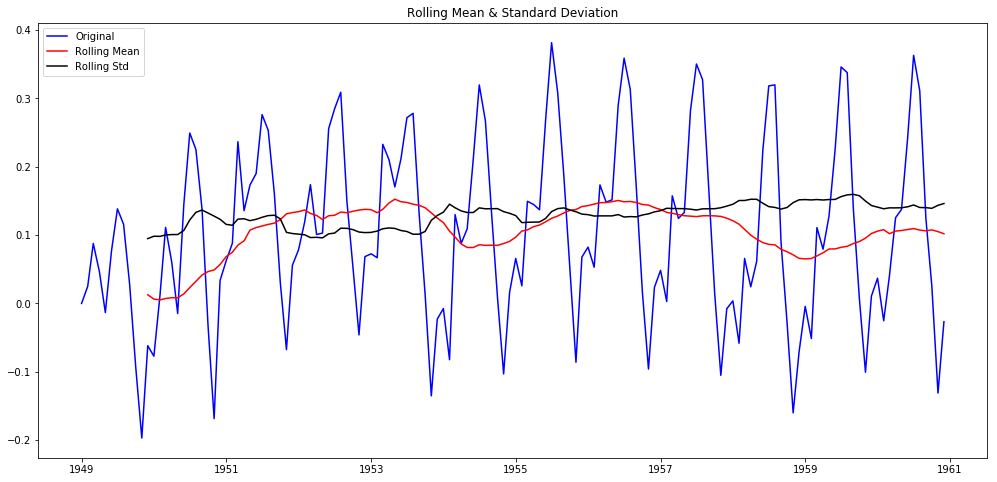

Results of Dickey-Fuller Test:
Test Statistic                  -3.566092
p-value                          0.006443
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [71]:
ewma = ts_log.ewm(12).mean()
time_rol_diff = (ts_log-ewma)

test_stationarity(time_rol_diff)

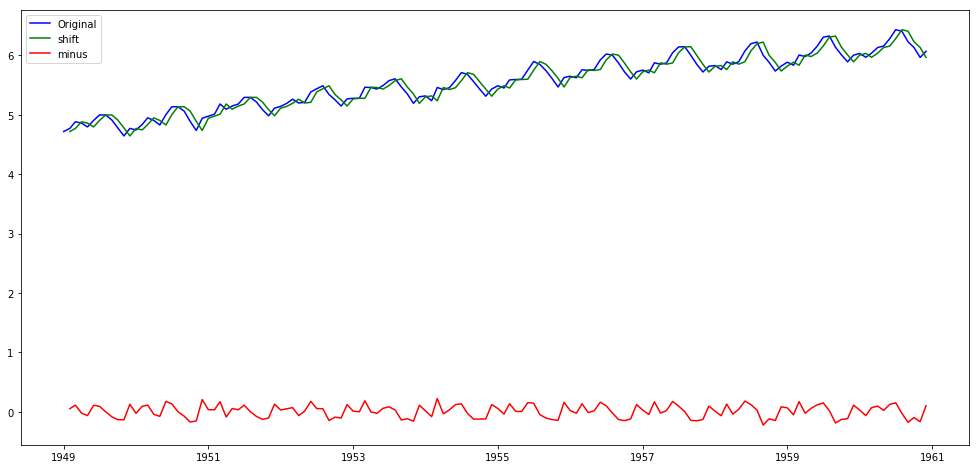

In [78]:
#Plot rolling statistics:
orig = plt.plot(ts_log, color='blue',label='Original')
shift = plt.plot(ts_log.shift(periods=1), color='green', label='shift')
minus = plt.plot(ts_log-ts_log.shift(periods=1), color='red', label='minus')
plt.legend(loc='best')
plt.show(block=False)

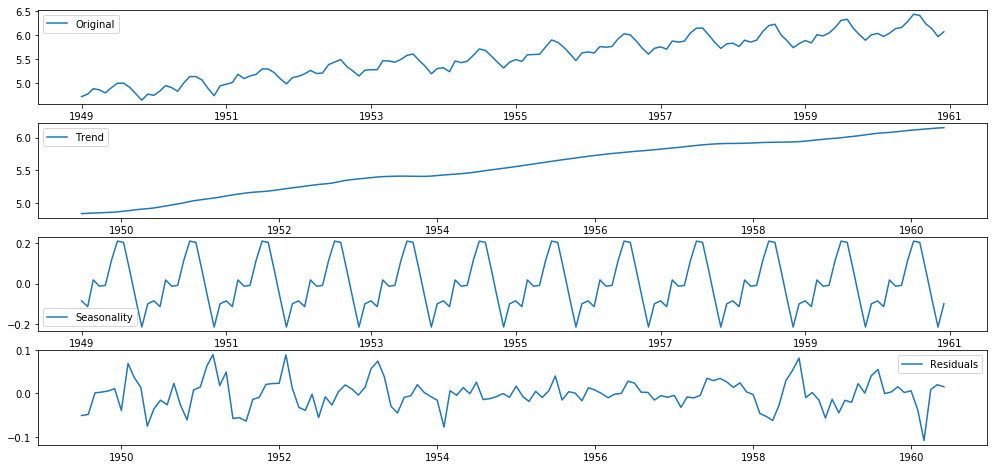

In [90]:
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
# plt.tight_layout()